# Water Quality Analysis

#### Water has been a very important thing for a living being on this planet, whether for drinking, cooking, cleaning.

It can be a life-giver or can be deadly as well as it can form organism which becomes fatal for other living creatures by causing Typhoid Fever, Cholera,Giardia,Dysentery, Escherichia Coli, Hepatitis A, Salmonella, polio, etc. So by studying and understanding the water quality we can determine and control the risk of bad health as well as the economy of a country and the future of an upcoming generation.

In this analysis, I am going to understand the water quality dataset for drinking and non-drinking water and predict the outcome.

### Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

### Data Exploration

In [3]:
data = pd.read_csv("water_potability.csv" , encoding_errors =  "ignore")

In [4]:
print("The shape of the data is :", data.shape)
print("The number of the rows in the data is :", data.shape[0])
print("The number of the column in the data is :", data.shape[1])

The shape of the data is : (3276, 10)
The number of the rows in the data is : 3276
The number of the column in the data is : 10


In [5]:
data

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [5]:
# Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


All features except Potability are fractional.

In [6]:
categorical = [var for var in data.columns if data[var].dtypes=='O']
numerical = [var for var in data.columns if data[var].dtypes!='O']

In [7]:
categorical

[]

In [8]:
numerical

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

Let's look at the statistics of the dataset

In [6]:
# Data description
data.describe().style.background_gradient(cmap = "Blues")

In [7]:
data.describe().T.style.background_gradient(cmap = "Blues")

In [11]:
!pip install missingno

In [12]:
import missingno as msno

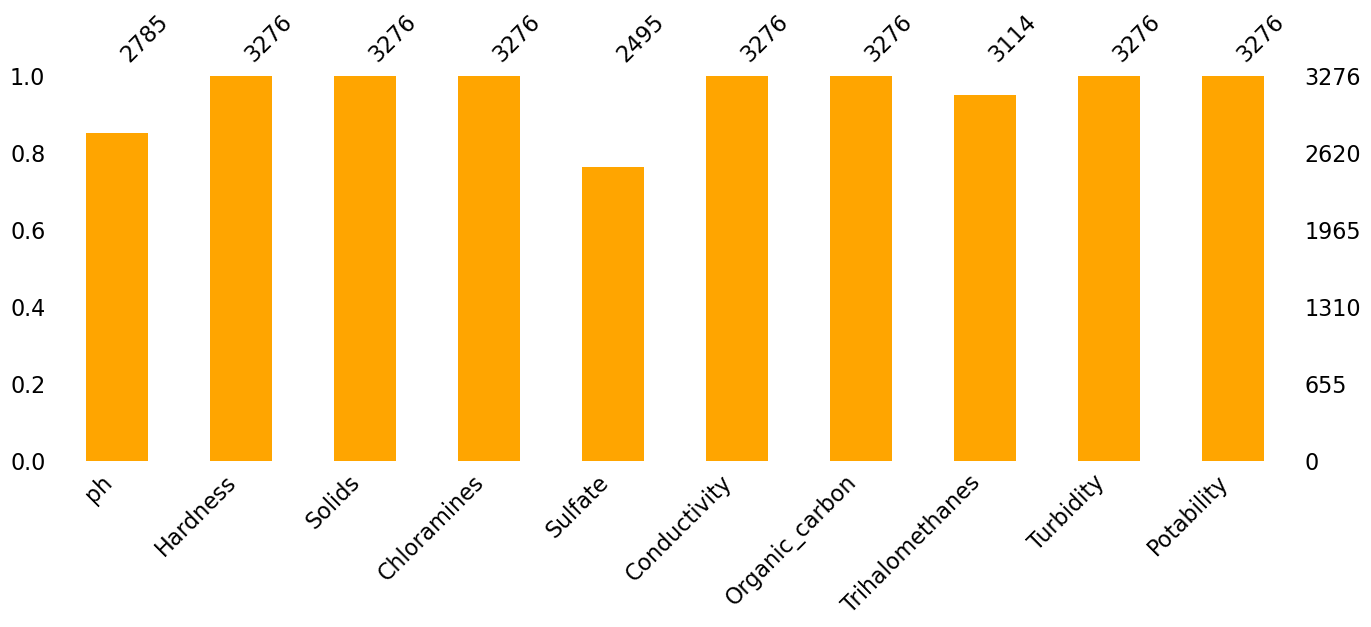

In [13]:
msno.bar(data,figsize = (16,5),color = "orange")
plt.show()

* Ph, Sulfate, Trihalomethanes column has the missing values.
* We will handle missing data on upcoming steps. it is proposed to restore the values of Ph, Sulfate, Trihalomethanes.


In [8]:
# Check the categorical and Numerical features

for cols in data.columns:
    unique_values = len(data[cols].unique())
    print("Feature '{cols}' has '{unique_values}' unique_values".format(cols = cols,
                                                                              unique_values = unique_values))

Feature 'ph' has '2786' unique_values
Feature 'Hardness' has '3276' unique_values
Feature 'Solids' has '3276' unique_values
Feature 'Chloramines' has '3276' unique_values
Feature 'Sulfate' has '2496' unique_values
Feature 'Conductivity' has '3276' unique_values
Feature 'Organic_carbon' has '3276' unique_values
Feature 'Trihalomethanes' has '3115' unique_values
Feature 'Turbidity' has '3276' unique_values
Feature 'Potability' has '2' unique_values


Only one feature is categorical, the rest are continuous numeric. Let's do a quick analysis of continuous features.

In [9]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [11]:
numerical_cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

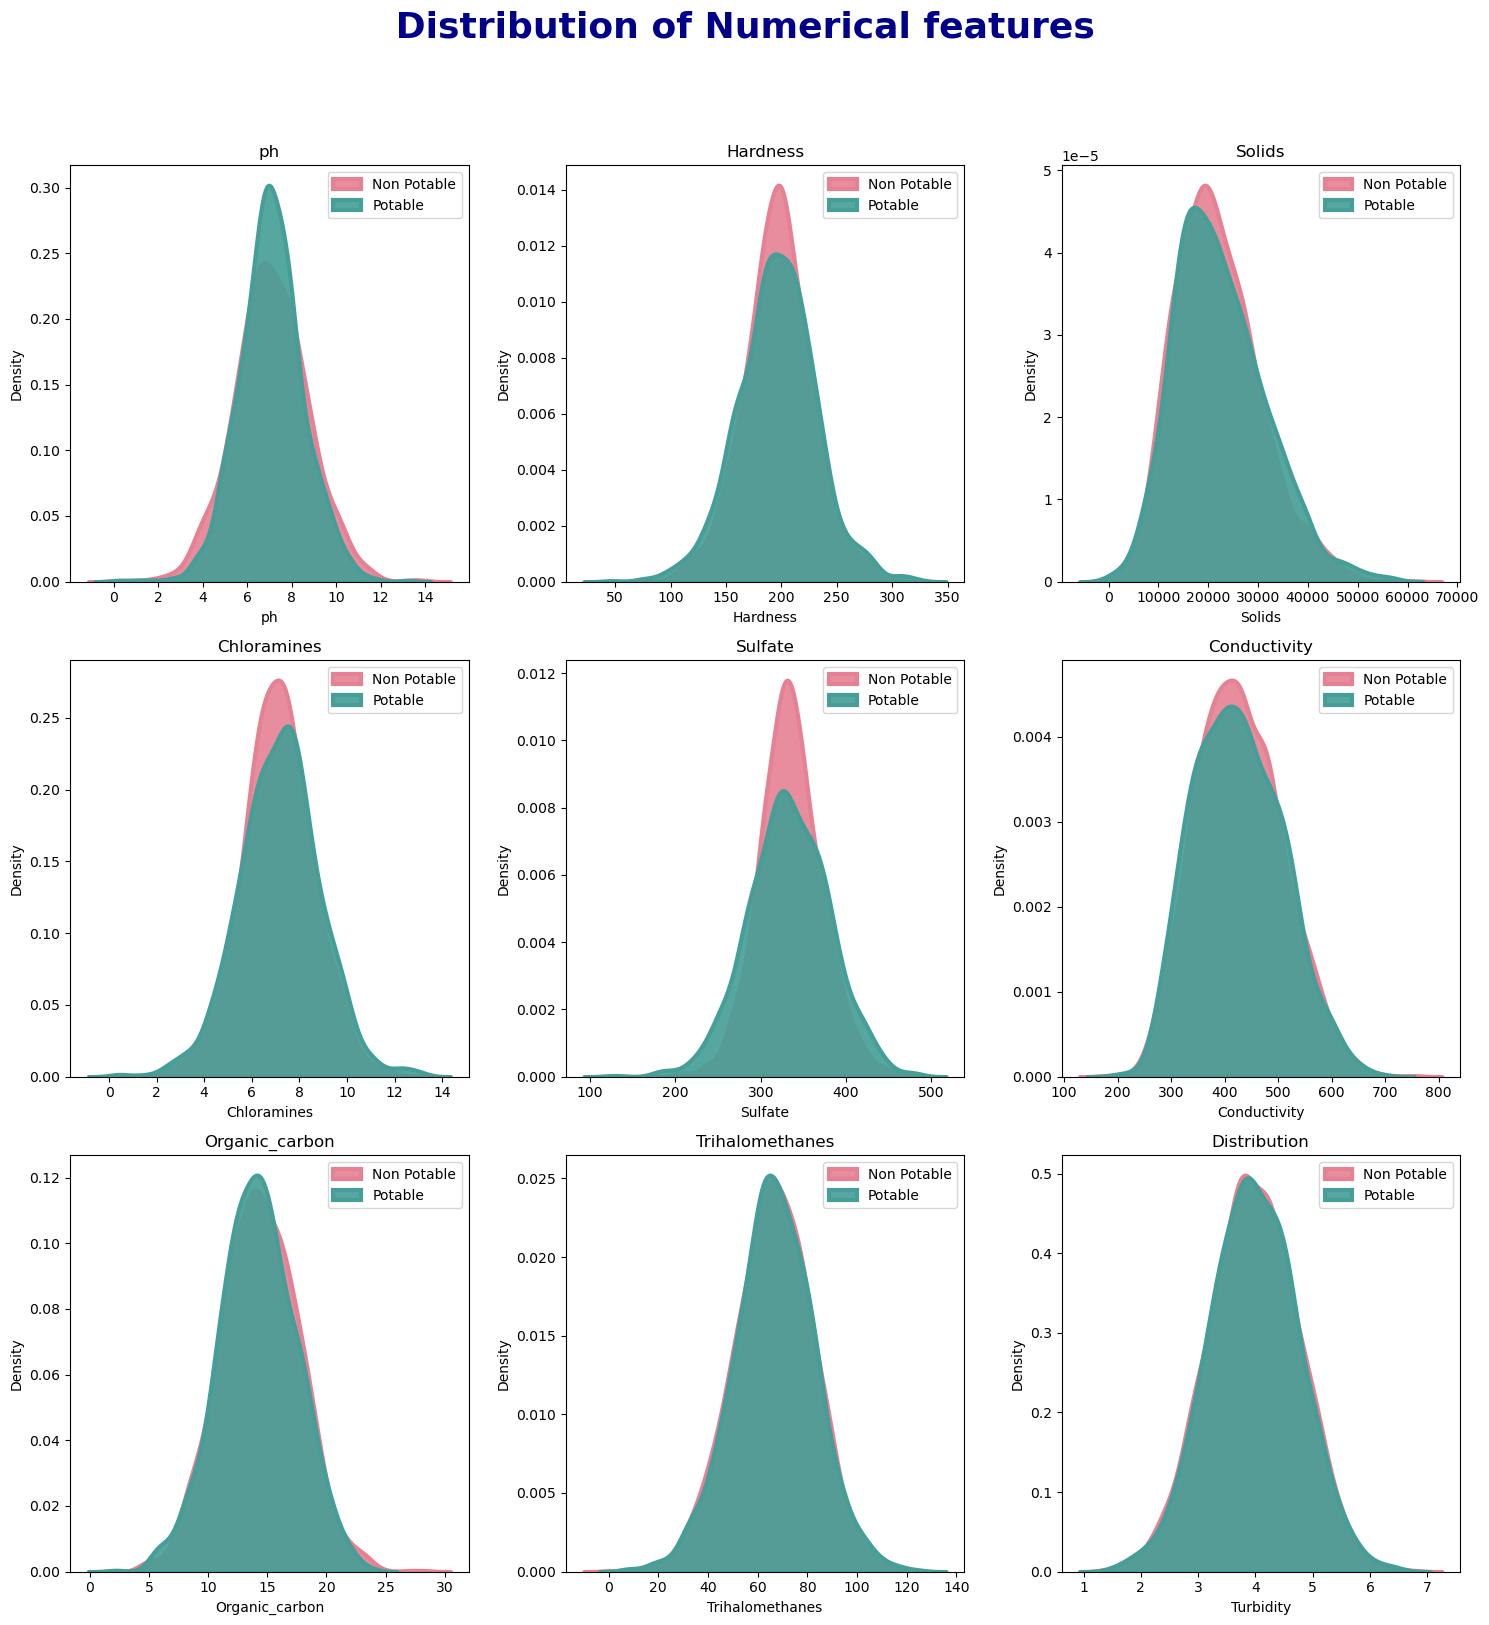

In [13]:
non_potable = data.query("Potability == 0")
potable = data.query("Potability == 1")

plt.figure(figsize = (15,15))
for i, cols in enumerate(data.columns[:9]):
    plt.subplot(3,3, i + 1)
    plt.title(cols)
    plotting = sns.kdeplot(x = non_potable[cols], label = "Non Potable",fill=True, common_norm=False, color="#E68193",alpha=.9, linewidth=3)
    plotting = sns.kdeplot(x = potable[cols], label = "Potable",fill=True, common_norm=False, color="#459E97",alpha=.9, linewidth=3)
    plt.legend()
plt.tight_layout()
plt.title('Distribution')
plotting.figure.suptitle(' Distribution of Numerical features ',y=1.08, size = 26, color = "darkblue", weight='bold');
plt.savefig("Distribution of Numerical features_{}.png".format(cols))

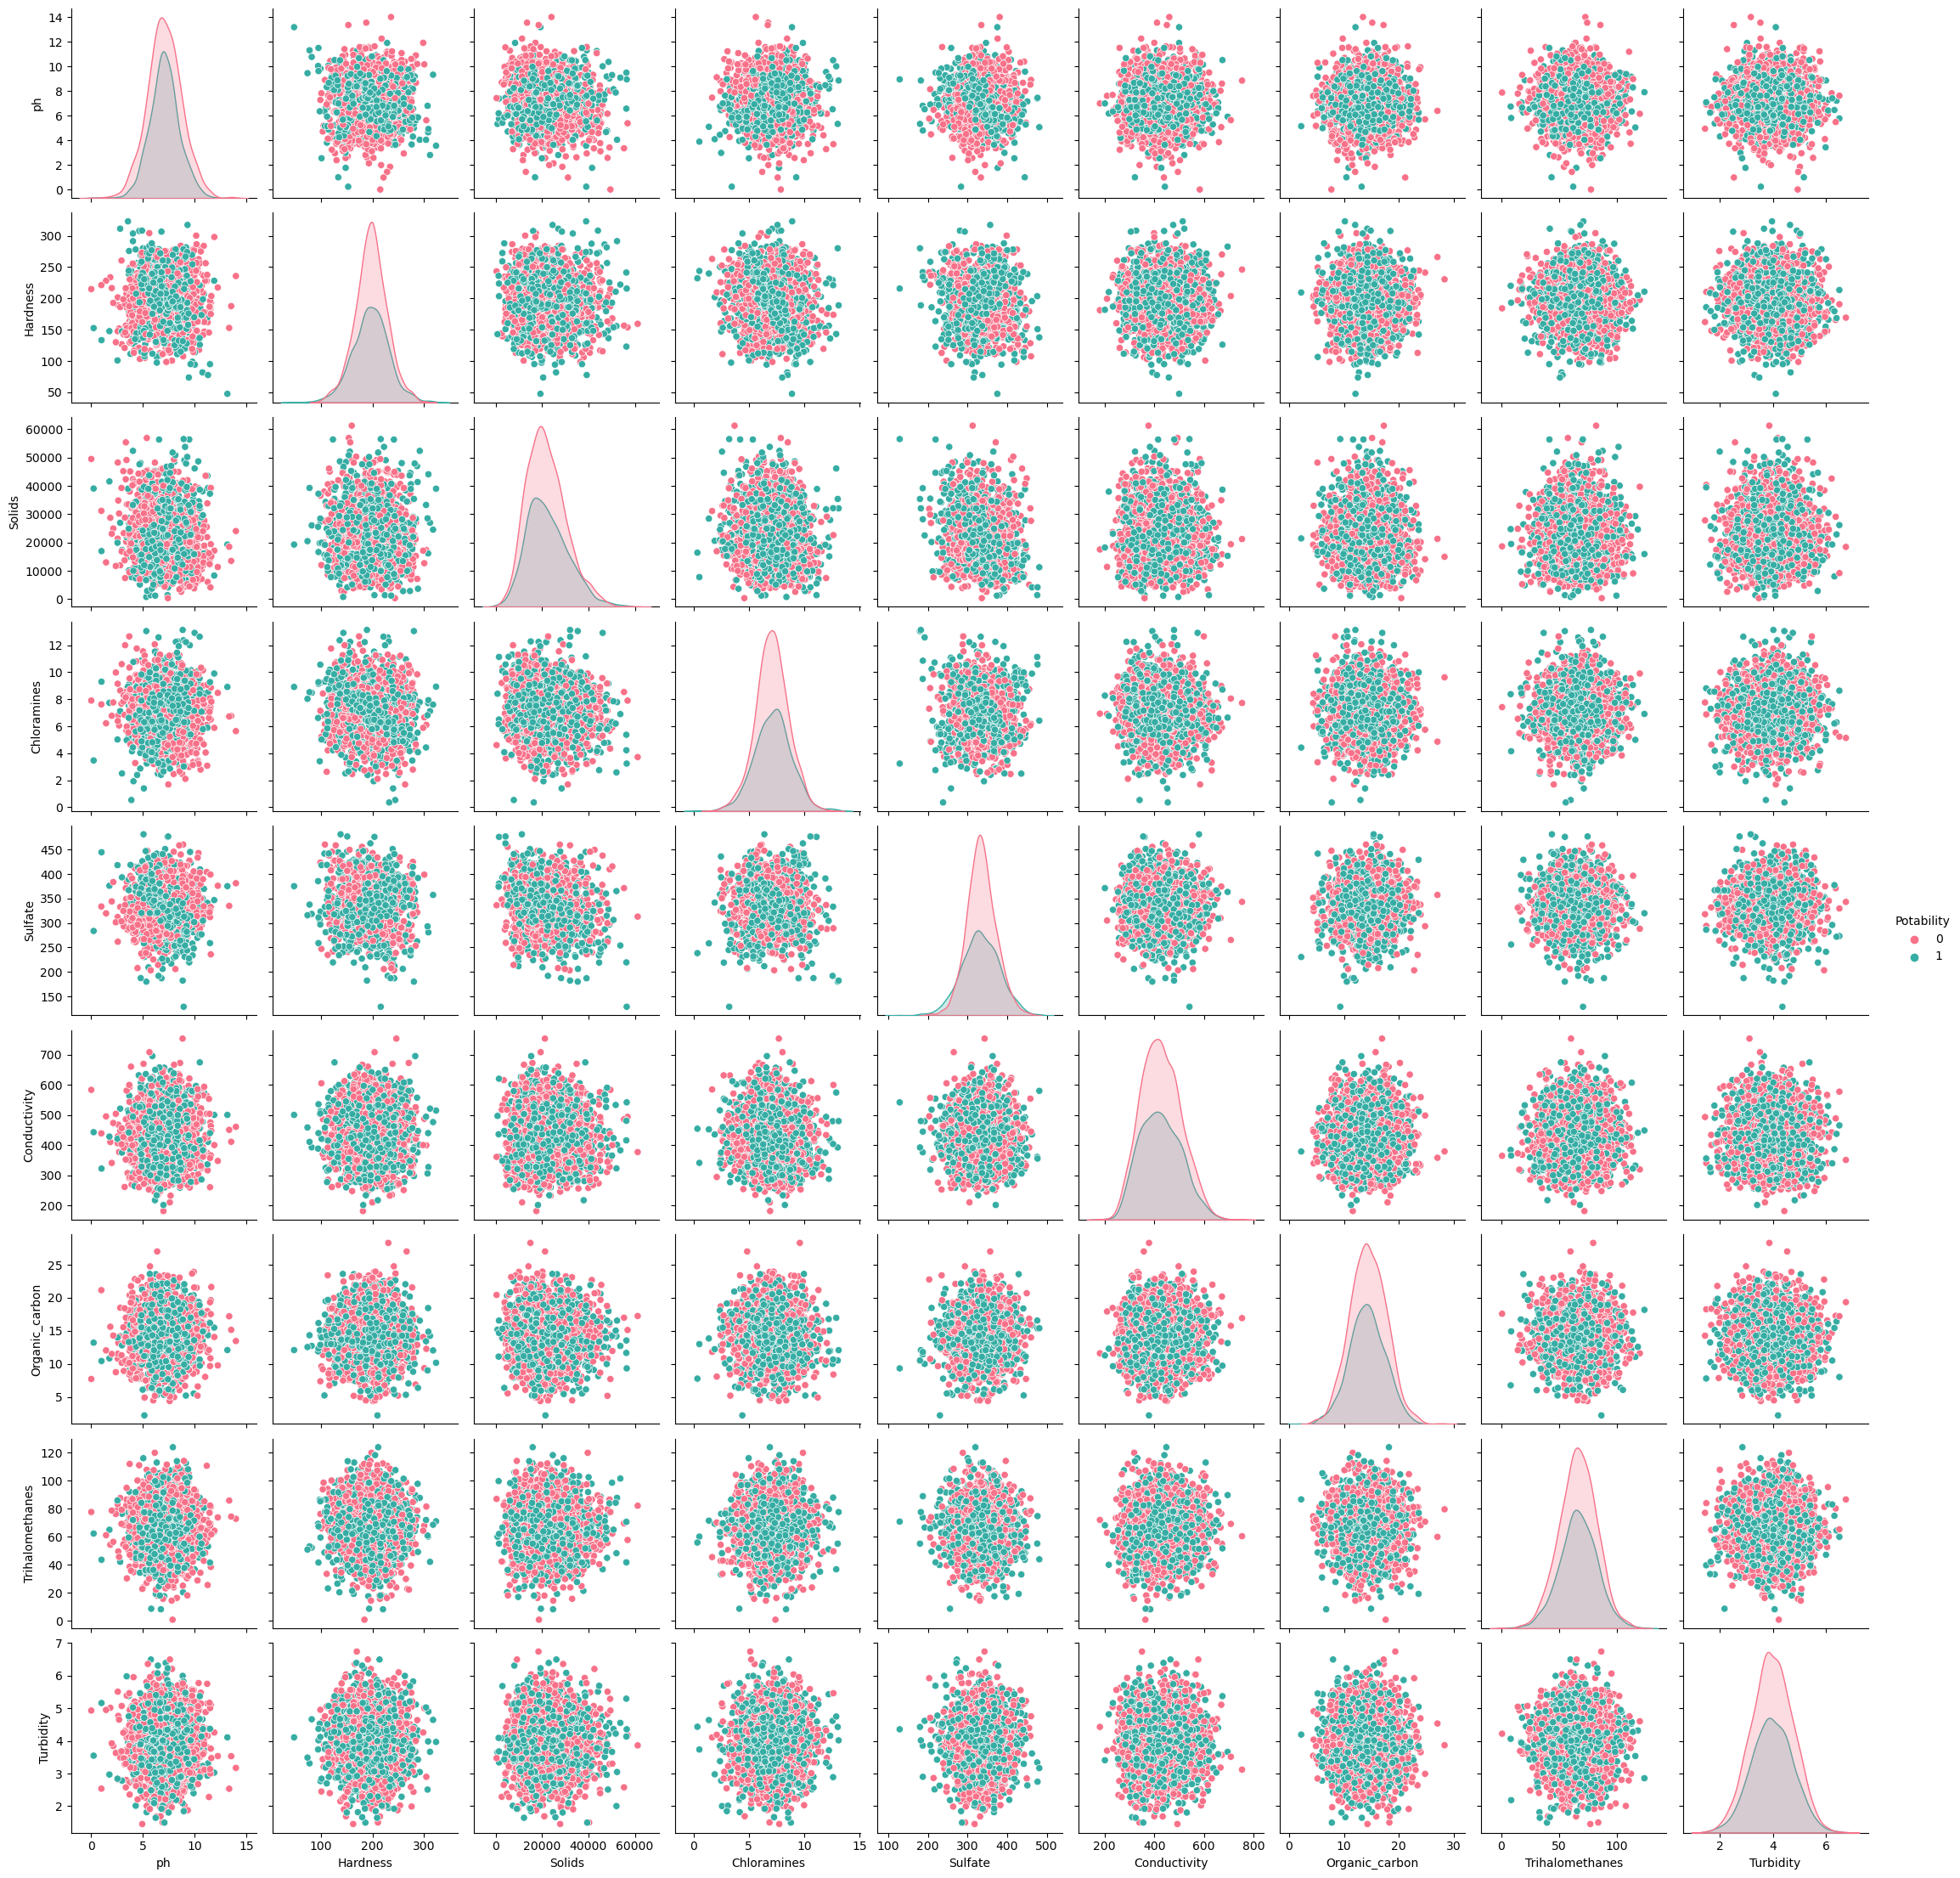

In [18]:
sns.pairplot(data ,hue = "Potability",diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

* Most features are distributed according to the normal
  distribution law.
* There are minor outliers for some features.

In [19]:
# Categorical Features
data["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [20]:
data["Potability"].value_counts().values

array([1998, 1278], dtype=int64)

In [21]:
data['Potability'].value_counts().index

Int64Index([0, 1], dtype='int64')

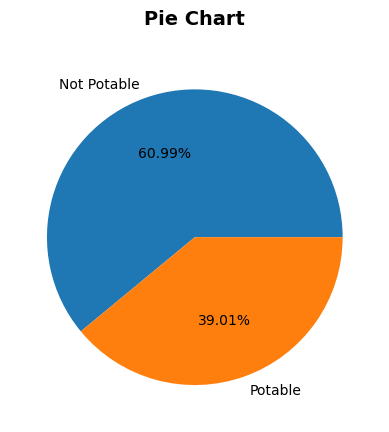

In [16]:
names = ["Not Potable", "Potable"]
plt.pie(labels=names,
        x=data["Potability"].value_counts().values, autopct = '%1.2f%%')

plt.title('Pie Chart', size = 14, color = "black", weight='bold', pad=20)
plt.savefig("Pie Chart_{}.png".format(names))
plt.show();

C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


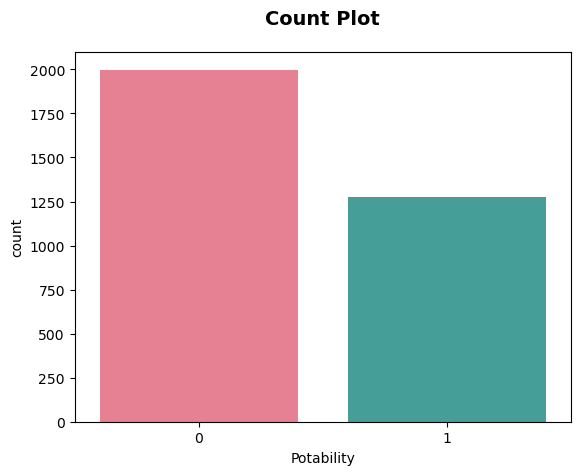

In [23]:
sns.countplot(data["Potability"],x=data["Potability"].value_counts().values,palette='husl')
plt.title('Count Plot', size = 14, color = "black", weight='bold', pad=20)
plt.savefig("Count Plot_{}.png".format(data["Potability"].value_counts().values))
plt.show()

* There is a clear class imbalance.

In [30]:
# Data null counts
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [31]:
data.ph.fillna(data.ph.mean(), inplace=True)
data.Sulfate .fillna(data.Sulfate .mean(), inplace=True)
data.Trihalomethanes.fillna(data.Trihalomethanes.mean(), inplace=True)


In [32]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [33]:
data

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.396293   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

The contents of the gaps are filled with the pandas.DataFrame.fillna method.

# Statistical Tests

In [34]:
correlation = data.corr()
print(correlation['Potability'].sort_values(ascending =False),'\n')

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.006960
Turbidity          0.001581
ph                -0.003287
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.020619
Organic_carbon    -0.030001
Name: Potability, dtype: float64 



Index(['Potability', 'Solids', 'Chloramines', 'Trihalomethanes', 'Turbidity',
       'ph', 'Conductivity', 'Hardness', 'Sulfate', 'Organic_carbon'],
      dtype='object')


<AxesSubplot:>

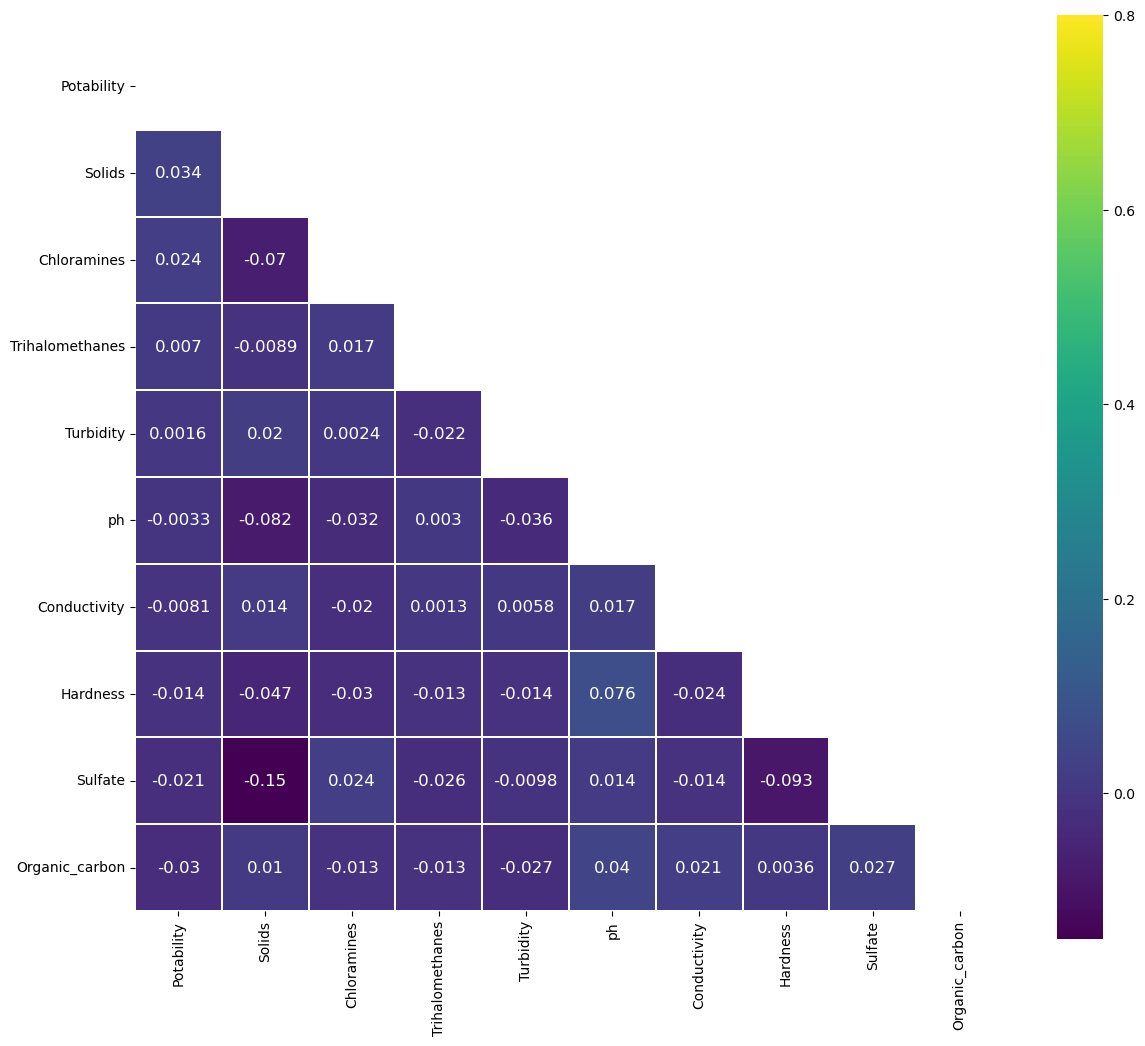

In [38]:
n= 18
cols = correlation.nlargest(n,'Potability')['Potability'].index
print(cols)
coecorr = np.corrcoef(data[cols].values.T)
mask = np.triu(np.ones_like(data.corr()))
plt.subplots(figsize = (14,12))
sns.heatmap(coecorr,mask=mask, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

* There are no mutually correlated signs, outliers can be removed, and class imbalance can also be eliminated.

# MACHINE LEARNING

In [37]:
!pip install catboost
!pip install xgboost

     ------------------------------------ 101.0/101.0 MB 365.9 kB/s eta 0:00:00
     -------------------------------------- 47.0/47.0 kB 235.9 kB/s eta 0:00:00
     -------------------------------------- 70.9/70.9 MB 573.1 kB/s eta 0:00:00


In [40]:
# Split
from sklearn.model_selection import train_test_split

#score
from sklearn.metrics import precision_score, accuracy_score, mean_absolute_error, mean_squared_error

#models
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import NearestCentroid,KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

#Hyper-Parameter-Tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [41]:
data.shape

(3276, 10)

In [42]:
# Separate the features and the target
# Separate X and y
X = data.drop('Potability', axis=1)
y = data['Potability']

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2620, 9), (656, 9), (2620,), (656,))

In [45]:
model = LogisticRegression()

In [46]:
# Start the training
model.fit(X_train,y_train)

LogisticRegression()

In [47]:
# Handling the missing values with mean
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

In [49]:
# Finding the best model with base parameters
models =[
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Ridge', RidgeClassifier()),
    ('KNeighbors Classifier',KNeighborsClassifier()),
    ('SGD Classifier', SGDClassifier(max_iter=1000, tol=1e-3)),
    ('Support Vector Classifier', SVC()),
    ('NuSVC', NuSVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Gaussian NB', GaussianNB()),
    ('Bernoulli NB', BernoulliNB()),
    ('Nearest Centroid', NearestCentroid()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Ada Boost Classifier', AdaBoostClassifier()),
    ('XGB Classifier', XGBClassifier(verbosity = 0))
]

results = dict()
for name, model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    score = accuracy_score(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    precision = precision_score(y_test, pred)
    results[name] = score

C:\Users\Sumit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sumit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sumit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

In [50]:
#Storing the results into dataframe
df_results = pd.DataFrame([results])
df_results = df_results.transpose()
df_results = df_results.rename(columns={0:'Score'}).sort_values(by='Score', ascending= False)

In [51]:
df_results.style.background_gradient(cmap = "Blues")

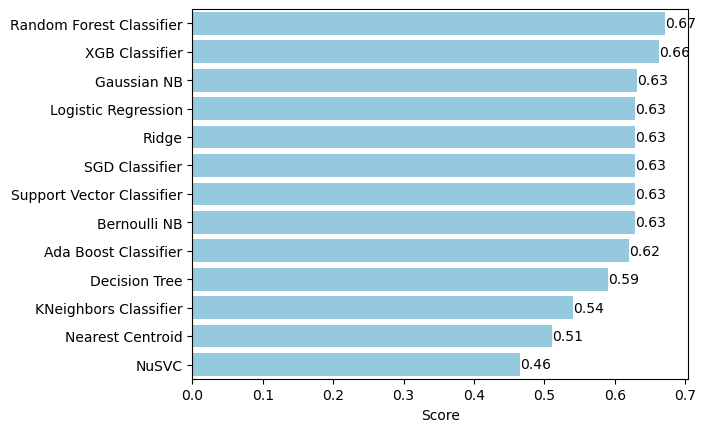

In [109]:
sns.barplot(data=df_results, y=df_results.index,
            x='Score', color="skyblue", linewidth=0.1)

# Add the values on top of the bars
for i, score in enumerate(df_results['Score']):
       plt.text(score, i, f'{score:.2f}', va='center')

# Show the plot
plt.show()

# Hyper Parameter Tuning

In [53]:
random_forest = RandomForestClassifier()

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
randomf_grid = {"n_estimators" :  np.arange(10,1000,50),
            "max_depth": [None, 3, 5, 7, 10],
            "min_samples_split": np.arange(2,20,2),
            "min_samples_leaf": np.arange(1, 25, 1)}

In [55]:
Random_search_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = randomf_grid,
                           cv=5,
                           n_iter = 20,
                           verbose=True,
                           n_jobs=-1
                           )
Random_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 7, 10],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [56]:
Random_search_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_depth': None}

In [57]:
# With the best params, got from RandomizedSearchCV, proceeding on GridsearchCV.
rs_rf_grid = {"max_depth": [None],
              "min_samples_leaf": [5,6,7],
              "min_samples_split": [15,16,17],
              "n_estimators": [960]}
gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid = rs_rf_grid,
                     cv= 5, 
                     verbose=True)

gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None], 'min_samples_leaf': [5, 6, 7],
                         'min_samples_split': [15, 16, 17],
                         'n_estimators': [960]},
             verbose=True)

In [58]:
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 7,
 'min_samples_split': 16,
 'n_estimators': 960}

In [60]:
gs_rf.score(X_test, y_test)

0.6844512195121951

In [135]:
y_preds = gs_rf.predict(X_test)

# Matrix

* Compute confusion matrix to evaluate the accuracy of a classification.

In [141]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

C:\Users\Sumit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


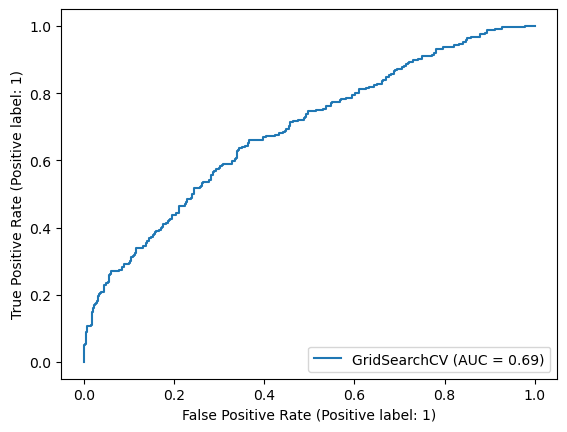

In [145]:
plot_roc_curve(gs_rf,X_test, y_test)

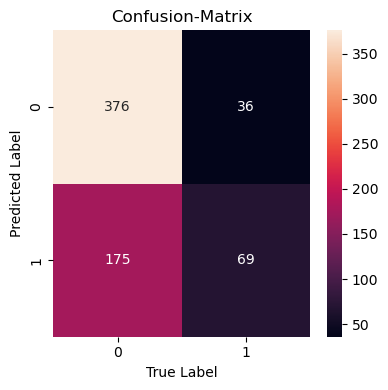

In [147]:
plt.subplots(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, y_preds),
                annot = True,
                cbar= True,
                fmt='g')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion-Matrix')
plt.tight_layout()  
plt.show()

In [152]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.68      0.91      0.78       412
           1       0.66      0.28      0.40       244

    accuracy                           0.68       656
   macro avg       0.67      0.60      0.59       656
weighted avg       0.67      0.68      0.64       656



# RECOMENDATIONS

* Settling. It's probably impossible to find something easier. It helps a lot to remove excess chlorine from the water, although not completely. Water must be poured into a vessel without a lid, left in it for 7 hours. First, volatile gases will evaporate from such water, then salts of heavy metals will precipitate. And now, after settling, you can pour about ¾ already into a new vessel without shaking. The rest is just poured out.
* Boiling. Also a characteristic cleaning method. To make the water purified, it is boiled over low heat for an hour. Only before this, the water must be defended, because if chlorine is present in the water, when boiled, it will become a very harmful carcinogen. And the boiling method cannot be the main one, since, alas, it increases the concentration of salts of heavy metals.
* Acid cleaning. For example, half a gram of ascorbic acid per 5 liters of water - that's the whole recipe for high-quality cleaning. The acid will work for about an hour. But this method is also often criticized, therefore, it may not be worth adding it to the list of the most used ones.
* Activated carbon. This component is often used as a sorbent in industrial filters. Charcoal tablets can also be used at home. Several pieces should be wrapped in gauze, put on the bottom of the container with liquid. It will take about half a day to clean up. Coal perfectly absorbs chlorine, helps to restore the neutrality of water with respect to odors.
* Apply filters. Ready-made industrial filters are, of course, the most comfortable option. Even ordinary meshes, which easily trap foreign particles, are already something. Very attractive filters with a nozzle on the faucet. Some of them are such models that pass ordinary water through the tap, there are those that direct the flow into the filter itself, and in this way they purify drinking water. Pitcher filters are also convenient, but their volume, unlike the previous ones, is limited. True, they are mobile, and this is their forte.
